In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
data = pd.read_csv('./RegressionData.csv')
data.head(10)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519
5,-130.768830,-1.556187,0.434455
6,-43.359202,-2.127122,1.032279
7,34.262447,1.105957,1.780675
8,357.839694,-0.846858,0.610009
9,276.943703,0.723174,-0.058932


In [6]:
data.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,-3.263196,0.073797,0.996858
std,99.896532,1.997194,0.791569
min,-323.203780,-6.144331,-0.650879
25%,-71.263595,-1.240731,0.331548
50%,-3.043251,0.099402,0.947372
75%,61.056271,1.347746,1.649241
max,357.839694,7.139736,3.325075


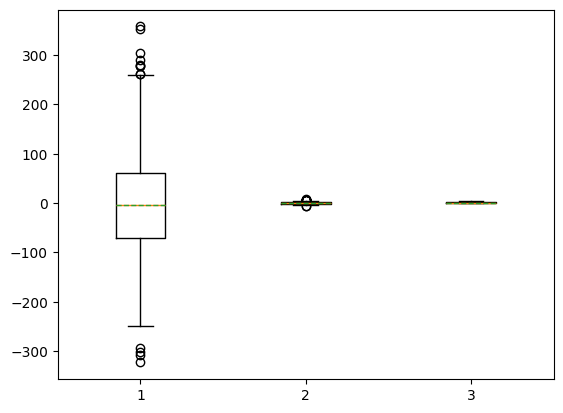

In [9]:
fig, ax = plt.subplots()
ax.boxplot((data['X1'],data['X2'],data['y']),showmeans=True, meanline= True)
plt.show()

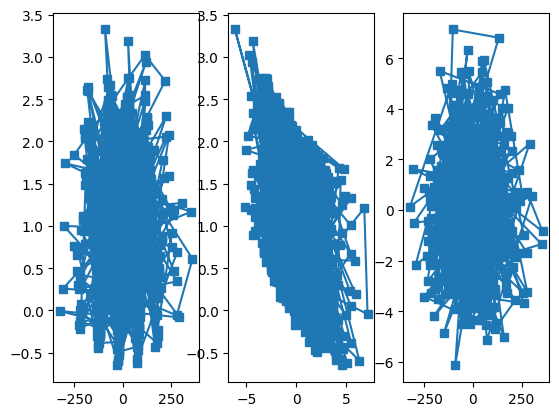

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3)
ax1.plot(data['X1'],data['y'],marker='s')
ax2.plot(data['X2'],data['y'],marker='s')
ax3.plot(data['X1'],data['X2'],marker='s')
plt.show()

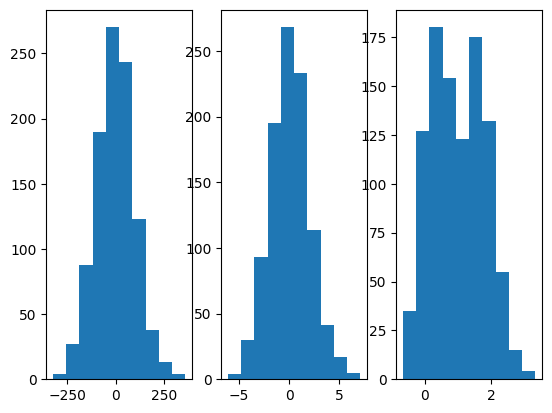

In [16]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3)
ax1.hist(data['X1'])
ax2.hist(data['X2'])
ax3.hist(data['y'])
plt.show()

[]

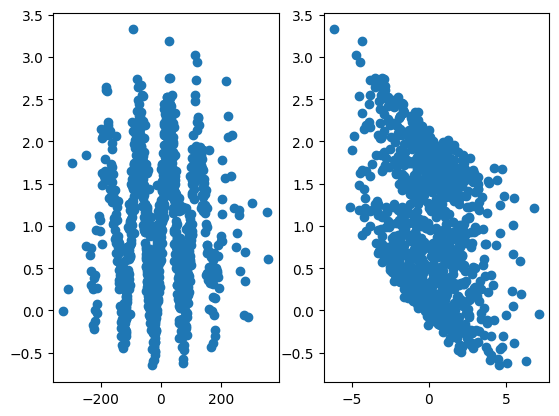

In [35]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(data['X1'],data['y'])
axs[1].scatter(data['X2'],data['y'])
plt.plot()

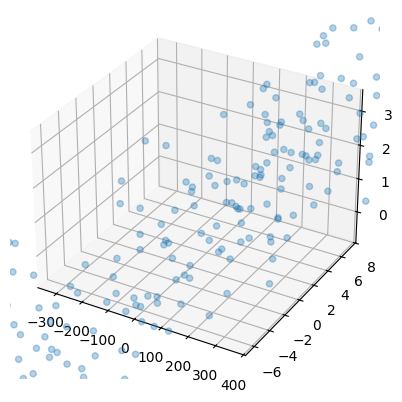

In [69]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(data['X1'],data['X2'],data['y'],zdir='x')
#ax.scatter(data['X1'],data['X2'],zs=0,zdir='x')
#ax.view_init(elev=50, azim=0, roll=0)

plt.show()

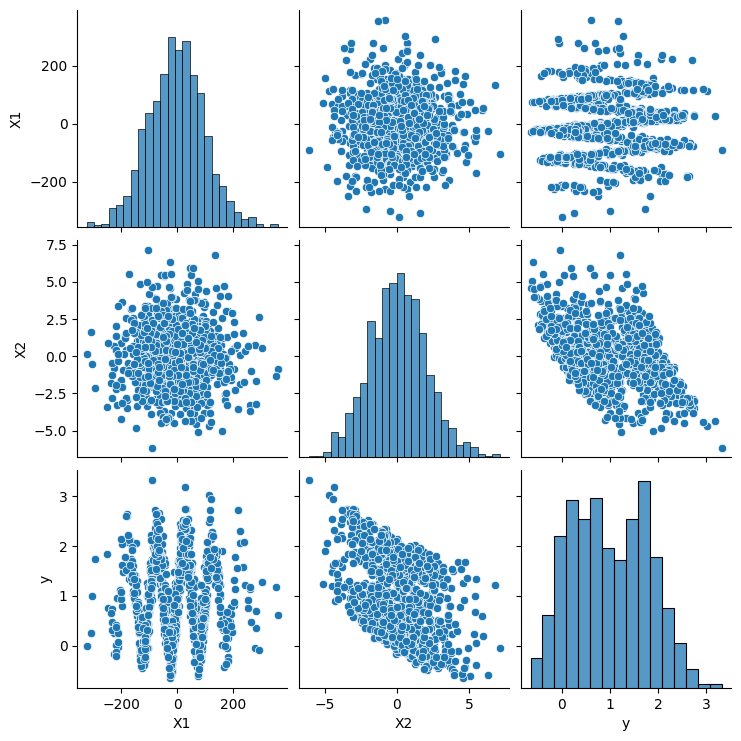

In [65]:
sns.pairplot(data)

In [71]:
corr_matrix = data.corr()
corr_matrix

,X1,X2,y
X1,1.000000,-0.009280,0.017148
X2,-0.009280,1.000000,-0.411762
y,0.017148,-0.411762,1.000000


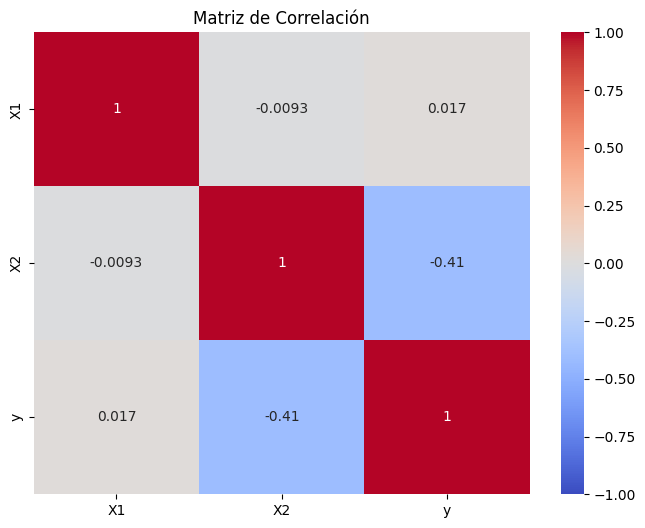

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [91]:
std = StandardScaler()
std_data= std.fit_transform(data)
pd_std = pd.DataFrame(std_data)

In [125]:
Std_X_train, Std_X_test, Std_y_train, Std_y_test = train_test_split(std_data[:,:2],std_data[:,2])
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'X1':'X2'],data.loc[:,'y'])

In [126]:
#lr_nat = LinearRegression().fit(data.loc[:,'X1':'X2'],y=data.loc[:,'y'])
#lr_std = LinearRegression().fit(std_data[:,:2],y=std_data[:,2])
lr_nat = LinearRegression().fit(X_train,y_train)
lr_std = LinearRegression().fit(Std_X_train,Std_y_train)

In [146]:
lr_nat.score(X_test,y_test)

0.17741559634325443

In [128]:
lr_std.score(Std_X_test,Std_y_test)

0.20349493203995672

In [129]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.sin, validate=True)

In [166]:
#transformer.transform(data.loc[:,'X1'])
a = np.sin(data.loc[:,'X1'])

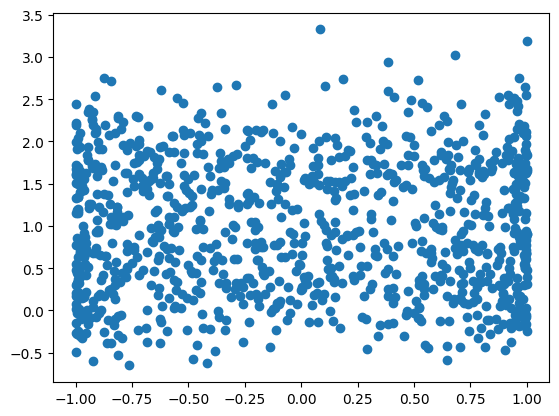

In [167]:
fig, ax = plt.subplots()
ax.scatter(a, data['y'])
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients : 
 [-1.37908038e-04 -1.60395647e-01]
Coefficients STD: 
 [-0.01959046 -0.39408511]
Mean squared error: 0.50
Mean squared error STD: 0.87
Coefficient of determination: 0.18
Coefficient of determination STD: 0.20


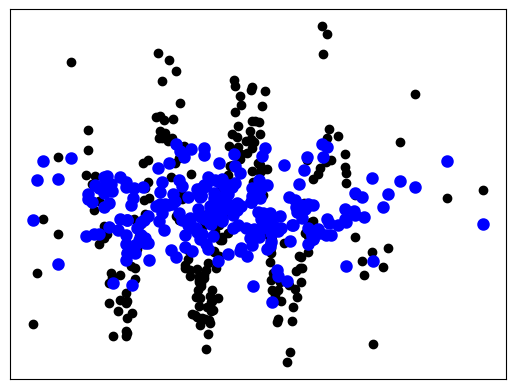

In [162]:
b = lr_nat.predict(X_test)
c = lr_std.predict(Std_X_test)
# The coefficients
print("Coefficients : \n", lr_nat.coef_)
print("Coefficients STD: \n", lr_std.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, b))
print("Mean squared error STD: %.2f" % mean_squared_error(Std_y_test, c))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, b))
print("Coefficient of determination STD: %.2f" % r2_score(Std_y_test, c))


# Plot outputs
plt.scatter(X_test['X1'], y_test, color="black")
plt.scatter(X_test['X1'],b, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

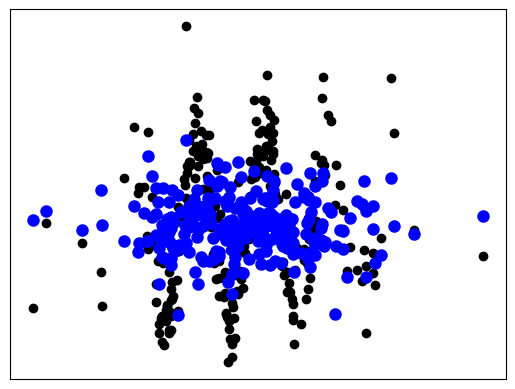

In [165]:
plt.scatter(Std_X_test[:,0], Std_y_test, color="black")
plt.scatter(Std_X_test[:,0],c, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [163]:
Std_X_test[:,0]

array([-5.76833577e-01, -1.66879253e+00, -1.05805569e+00, -1.25254591e+00,
        5.10642717e-01, -7.46418779e-01, -8.44392925e-01, -1.13783666e+00,
        1.19138153e+00, -9.98667824e-01,  1.22116462e+00,  9.63770944e-01,
       -2.15669864e+00, -3.12914111e-01,  1.54558572e+00,  6.59923468e-01,
        3.43667563e-01, -1.29640024e+00, -2.67890065e-01, -1.18330060e+00,
       -2.23212016e-02, -8.32297844e-01, -5.26470080e-01, -5.61479825e-01,
        1.78003622e+00, -1.59561944e+00,  1.07024994e+00,  4.38797751e-01,
       -1.17782722e+00,  2.04532126e-01,  1.59824244e-01, -2.11407540e-01,
       -4.29910638e-01,  6.41216344e-01, -2.76433984e-01, -7.33342433e-01,
       -2.28882857e-01, -1.13596964e-01, -5.39442017e-01, -9.61862818e-01,
        4.46112434e-01, -2.40784421e-01, -3.31134567e-01,  6.86383659e-01,
       -1.47579203e+00, -1.30735054e+00, -3.02056096e-02,  4.59724866e-01,
        7.48523312e-01,  9.98393202e-01, -7.20368028e-01, -1.37453236e-01,
       -2.45742235e+00,  